In [159]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
from collections import Counter
import matplotlib.ticker as plticker
import pickle, os, tldextract
pd.set_option('display.max_columns', None)

In [161]:
def initialize_style_parameters(small = False):
  
    if small == False:
        font = {
                'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 22
                }
    else:
        font = {
                'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 15
                }

    plt.rc('font', **font)

In [162]:
def cdf(xlist, namelist, title, colors, x_title = "", xlog=False, filename = "", size = (15, 6)):
    
    initialize_style_parameters()
    
    fig, ax = plt.subplots(figsize=(size[0],size[1]))
    for x,n,c in zip(xlist,namelist,colors):
        sorteddiff = np.sort(x)
        p = 1. * np.arange(len(sorteddiff))/(len(sorteddiff) - 1)
        plt.plot(sorteddiff, p,label=n, color=c, linewidth=3)

    if(xlog==True):
        plt.xscale('symlog')
        
    plt.ylabel('cumulative distribution function')
    plt.tight_layout()
    plt.grid(linestyle='dotted',linewidth=1.5)
    ax.legend(facecolor='white', framealpha=1, frameon = True)
    plt.xlabel(x_title)
    if filename!='':
        plt.savefig(filename,bbox_inches="tight")
        
    ax.set_title(title)
    plt.show()

In [163]:
def boxplot(data, xlabel, ylabel, width = 0.3, style = "whitegrid", x = None, y = None, hue = None, colors = None, small = False, img_name = None):
    
    fig, ax = plt.subplots(figsize=(15,6))
    sns.set_style(style)

    if colors is not None:
        sns.set_palette(sns.color_palette(colors))

    sns.boxplot(ax = ax, data = data, width = width, x = x, y = y, hue = hue).set(
        xlabel = xlabel, 
        ylabel = ylabel,
        yscale = "log"
    )

    if img_name is not None:
        save_pdf_img(plt, img_name)

    plt.show()

In [164]:
#US_PAGES_PATH = "page_list/us_pages_merged_transparency_data_final.csv"
US_PAGES_PATH = "page_list/US_PAGES_TO_USE_FOR_ANALYSIS_final.csv"
US_PAGES = pd.read_csv(US_PAGES_PATH,index_col=None)
US_PAGES

/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022
0,0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17
1,1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17
2,2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2
3,3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24
4,4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# 1. Extract the fraction of each domain for all Facebook pages

In [165]:
domains_per_page = dict()

### Extracting domains and saving them

In [8]:
# I USED THIS CODE TO GENERATE THE FILE, NOW I JUST LOAD IT

'''

for idx, row in US_PAGES.iterrows():
        
    
    if row["page_id"] in domains_per_page:
        continue
    
    if str(row["history_file"]) == "nan":
        continue
    
    history_file_with_shortened_urls = "/ssd/news_discovery/data/pages_posts_history_minhkha_with_url_shorteners/" + row["history_file"].split("/")[3]
    
    if not os.path.exists(history_file_with_shortened_urls):
        continue

    history_data = pd.read_csv(history_file_with_shortened_urls)
    unshortened_links = history_data["unshortened_link"].to_list()
    final_links = history_data["final_link"].to_list()
    links = history_data["link"].to_list()
    domains = []

    for i in range(len(links)):
        
        domain = ""

        if str(unshortened_links[i]) != "nan":
            domain = tldextract.extract(unshortened_links[i]).domain            
            
        elif str(final_links[i]) != "nan":
            domain = tldextract.extract(final_links[i]).domain            

        elif str(links[i]) != "nan":
            domain = tldextract.extract(links[i]).domain
            

        if domain not in ["facebook"]:
            domains.append(domain)
            
        else:
            domains.append(domain)
                
    domains = Counter(domains)
    total = sum(domains.values())
    domains = domains.most_common()
    
    domains_per_page[row["page_id"]] = {item[0]:(item[1]/total, item[1]) for item in domains}
    
with open('domains_per_page.pickle', 'wb') as handle:
    pickle.dump(domains_per_page, handle, protocol=pickle.HIGHEST_PROTOCOL)

'''


'\n\nfor idx, row in US_PAGES.iterrows():\n        \n    \n    if row["page_id"] in domains_per_page:\n        continue\n    \n    if str(row["history_file"]) == "nan":\n        continue\n    \n    history_file_with_shortened_urls = "/ssd/news_discovery/data/pages_posts_history_minhkha_with_url_shorteners/" + row["history_file"].split("/")[3]\n    \n    if not os.path.exists(history_file_with_shortened_urls):\n        continue\n\n    history_data = pd.read_csv(history_file_with_shortened_urls)\n    unshortened_links = history_data["unshortened_link"].to_list()\n    final_links = history_data["final_link"].to_list()\n    links = history_data["link"].to_list()\n    domains = []\n\n    for i in range(len(links)):\n        \n        domain = ""\n\n        if str(unshortened_links[i]) != "nan":\n            domain = tldextract.extract(unshortened_links[i]).domain            \n            \n        elif str(final_links[i]) != "nan":\n            domain = tldextract.extract(final_links[i]).do

### Loading pages from file

In [166]:
with open('domains_per_page.pickle', 'rb') as f:
    domains_per_page = pickle.load(f)

In [167]:
LISTED_PAGES = US_PAGES[US_PAGES["niche"] == False]
NONLISTED_PAGES = US_PAGES[US_PAGES["niche"] == True]

# 2. Fraction of most shared domains

### Check that all domains were correctly unshortened

In [168]:
for page_id, fraction_per_domain in domains_per_page.items():
        for domain, fraction_and_nb in fraction_per_domain.items():
            if domain in ["trib", "ow", "t", "bitly", "tinyurl", "rebrandly", "usehyperlink", "tiny", "bit", "clickmeter", "shorte", "cutt", "clkim"]:
                if fraction_and_nb[0] >= 0.02:
                    print("page:", page_id, "Fraction", fraction_and_nb[0], "domain:", domain)
                    print("results for this page:")
                    print(domains_per_page[page_id])
                    print()


page: 216699955036729 Fraction 0.1292803250145096 domain: bitly
results for this page:
{'cjonline': (0.8356065002901916, 5759), 'bitly': (0.1292803250145096, 891), 'facebook': (0.018717353453279163, 129), 'youtube': (0.01044689495066744, 72), 'secondstreetapp': (0.003627394080092861, 25), '': (0.0008705745792222867, 6), 'cjon': (0.0005803830528148578, 4), 'issuu': (0.0002901915264074289, 2), 'salina': (0.00014509576320371445, 1), 'butlercountytimesgazette': (0.00014509576320371445, 1), 'omny': (0.00014509576320371445, 1), 'nimbledeals': (0.00014509576320371445, 1)}



### Fraction of most shared domain

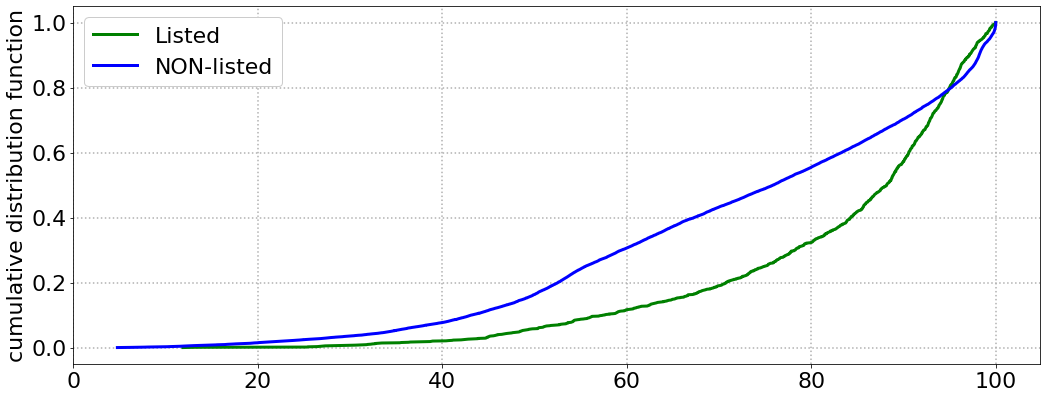

In [171]:
LISTED_FRACTIONS = []
NON_LISTED_FRACTIONS = []

LISTED_IDS = LISTED_PAGES["page_id"].to_list()
NONLISTED_IDS = NONLISTED_PAGES["page_id"].to_list()

NEWS_AGGREGATORS = []

for page_id, fraction_per_domain in domains_per_page.items():
    
    if page_id in LISTED_IDS:
        LISTED_FRACTIONS.append(list(fraction_per_domain.values())[0][0])

    elif page_id in NONLISTED_IDS:
        NON_LISTED_FRACTIONS.append(list(fraction_per_domain.values())[0][0])
        
    else:
        continue
        
    if list(fraction_per_domain.values())[0][0] < 0.5:
        NEWS_AGGREGATORS.append(page_id)
    
LISTED_FRACTIONS = [100*item for item in LISTED_FRACTIONS]
NON_LISTED_FRACTIONS = [100*item for item in NON_LISTED_FRACTIONS]

cdf([LISTED_FRACTIONS, NON_LISTED_FRACTIONS], ["Listed", "NON-listed"], "", ["green", "blue"], x_title = "", xlog=False, size = (15, 6))


### Number of news aggregators

In [173]:
print("number of news aggregators:", len(NEWS_AGGREGATORS), "fraction:", len(NEWS_AGGREGATORS) / len(domains_per_page))
print()
print("frraction overall", len(NEWS_AGGREGATORS)/US_PAGES.shape[0])



number of news aggregators: 2508 fraction: 0.09463079651360223

frraction overall 0.1514584214022586


### Number of news aggregators for listed an non-listed

In [174]:
LISTED_AGGREGATORS = [item for item in NEWS_AGGREGATORS if item in LISTED_IDS]
NONLISTED_AGGREGATORS = [item for item in NEWS_AGGREGATORS if item in NONLISTED_IDS]

LISTED_REVIEWED = [item for item in list(domains_per_page.keys()) if item in LISTED_IDS]
NONLISTED_REVIEWED = [item for item in list(domains_per_page.keys()) if item in NONLISTED_IDS]

print("number of listed news aggregators:", len(LISTED_AGGREGATORS), "fraction:", len(LISTED_AGGREGATORS) / len(LISTED_REVIEWED))
print()
print("number of non-listed news aggregators:", len(NONLISTED_AGGREGATORS), "fraction:", len(NONLISTED_AGGREGATORS) / len(NONLISTED_REVIEWED))





number of listed news aggregators: 79 fraction: 0.05830258302583026

number of non-listed news aggregators: 2429 fraction: 0.16315153143471253


### Studying news aggregators

In [175]:
print("number of listed aggregators", len(LISTED_AGGREGATORS), "fraction:", len(LISTED_AGGREGATORS) / len(NEWS_AGGREGATORS))
print()
print("number of nonlisted aggregators", len(NONLISTED_AGGREGATORS), "fraction:", len(NONLISTED_AGGREGATORS) / len(NEWS_AGGREGATORS))


number of listed aggregators 79 fraction: 0.03149920255183413

number of nonlisted aggregators 2429 fraction: 0.9685007974481659


### Example of nonlisted aggregators

In [176]:
NONLISTED_PAGES[NONLISTED_PAGES["page_id"].isin(NONLISTED_AGGREGATORS)].sort_values("currentFollowers", ascending=False).head(50)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022
14692,22641,22641,22641,22641,22641,22646,1850833625209292,In The Know Innovation,2018-04-09,2022-06-20,220774.0,20283198.0,MEDIA_NEWS_COMPANY,20871,144313953.0,6.559725e+05,83413.0,220,True,True,en,US,52.18724546020795,0.1197834315557472,47.69297110823632,intheknow.com | yahoo.com | aol.com,intheknow.com,3,94.868182,95.301370,0,2018-04,['US'],['en'],['MEDIA_NEWS_COMPANY'],['In The Know Innovation'],91,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,"United States (48), Australia (2), Canada (2)...",Yahoo! Inc.,"Sunnyvale, Santa Clara County, California, Uni...",US,US,56.0,6.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/1850833625...,2020-10-01,2022-06-02,18,13
9207,14116,14116,14116,14116,14116,14120,137187660126037,NTD Life,2017-06-19,2022-06-20,0.0,17665065.0,MEDIA_NEWS_COMPANY,51254,98790391.0,4.082248e+05,276323.5,242,True,True,en,US,81.17415226128692,2.0056971163226285,16.820150622390457,theepochtimes.com | ntd.com | ntd.tv | theepoc...,theepochtimes.com,5,211.793388,196.375479,1,2017-02,['US'],['en'],['MEDIA_NEWS_COMPANY'],['NTD Life'],754,US,en,MEDIA_NEWS_COMPANY,1,2,1,1,0.0,"United States (16), Canada (3), Australia (2)...",NaN,NaN,US,NaN,29.0,8.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/1371876601...,2020-10-01,2022-06-02,30,30
13475,20736,20736,20736,20736,20736,20740,1494731297498009,Food Insider,2017-06-19,2022-06-20,0.0,11566081.0,MEDIA_NEWS_COMPANY,64860,91646922.0,3.497974e+05,207129.0,262,True,True,en,US,68.99629972247918,0.0585877274128893,30.94511255010793,insider.com | businessinsider.com | thisisinsi...,insider.com,3,247.557252,248.505747,1,2015-11,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Food Insider'],146,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,3.0,"United States (80), United Kingdom (12), Cana...","INSIDER, INC.","City of New York, New York, United States",US,US,96.0,6.0,False,NaN,-1,-1,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/1494731297...,2020-10-01,2022-06-02,29,17
2592,4026,4026,4026,4026,4026,4026,1413475698959824,Insider,2019-03-04,2022-06-20,10188080.0,10507732.0,MEDIA_NEWS_COMPANY,100000,37788142.0,2.262763e+05,68288.0,167,True,True,en,US,86.997,0.073,12.93,insider.com | businessinsider.com,insider.com,2,598.802395,581.395349,1,2015-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Insider'],1258,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,2.0,"United States (118), Israel (17), United King...","INSIDER, INC.","New York, Westchester and Boston Railway, Nort...",US,US,154.0,9.0,False,NaN,-1,-1,2020-10-10,True,True,True,../data/pages_posts_history_minhkha/1413475698...,2020-10-10,2022-06-02,8,30
15511,23878,23878,23878,23878,23878,23883,69001530484,I Love My Family,2017-06-19,2022-06-20,0.0,9530673.0,NEWS_SITE,18915,24121062.0,9.845331e+04,32288.0,245,True,True,en,US,74.76605868358445,18.04388051810732,7.190060798308224,familytoday.com | patheos.com | beliefnet.com ...,familytoday.com,4,77.204082,72.471

### Number of shared domains per news aggregator

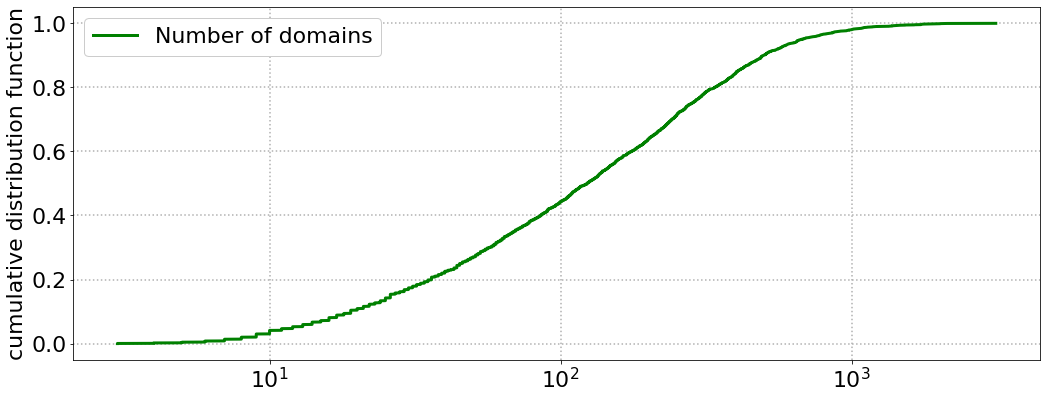

123.0


In [177]:
Number_of_domains = []

to_check = []
for page_id in NEWS_AGGREGATORS:
    
    Number_of_domains.append(len(domains_per_page[page_id]))
    
    if len(domains_per_page[page_id]) > 1000:
        to_check.append(page_id)
    


cdf([Number_of_domains], ["Number of domains"], "", ["green", "blue"], x_title = "", xlog=True, size = (15, 6))

print(np.median(Number_of_domains))

In [178]:
to_check

[227301997254,
 270645380043458,
 155807924751184,
 263896729508,
 145014339508197,
 192137714179539,
 117608890083,
 566786290035815,
 373935332101,
 367732726624621,
 485754644838324,
 450710658347574,
 1635753833366981,
 475539722825471,
 305333123219746,
 581558278539736,
 9470605698,
 180079713891,
 193831470695437,
 332474186770088,
 974133602697851,
 309574272740464,
 119792248072735,
 1559656530992962,
 1415262968735659,
 440079556032486,
 120773971319074,
 972119712810032,
 582675068550931,
 1392683307647303,
 1984628061815270,
 760185630718960,
 1740478172841995,
 526097457449590,
 1165434540182631,
 112352515999,
 444725060229,
 1431801253735293,
 569702199708308,
 345437835471519,
 59947163979,
 230007017116293,
 315156722631146,
 133264840021970,
 123492761167878,
 73944197703,
 50521001748,
 348150205261233,
 387298311335707,
 199185230105826]

# THIS SHOULD BE MOVED TO ACTIVITY 

### Distribution of number of days between first and last posts

In [7]:
first_post_dates = [datetime.strptime(item,"%Y-%m-%d") for item in US_PAGES["firstPostDate"].to_list()]
last_post_dates = [datetime.strptime(item,"%Y-%m-%d") for item in US_PAGES["lastPostDate"].to_list()]
deltas = [(last_post_dates[index] - first_post_dates[index]).days + 1 for index in range(len(first_post_dates))]
US_PAGES["deltas"] = deltas


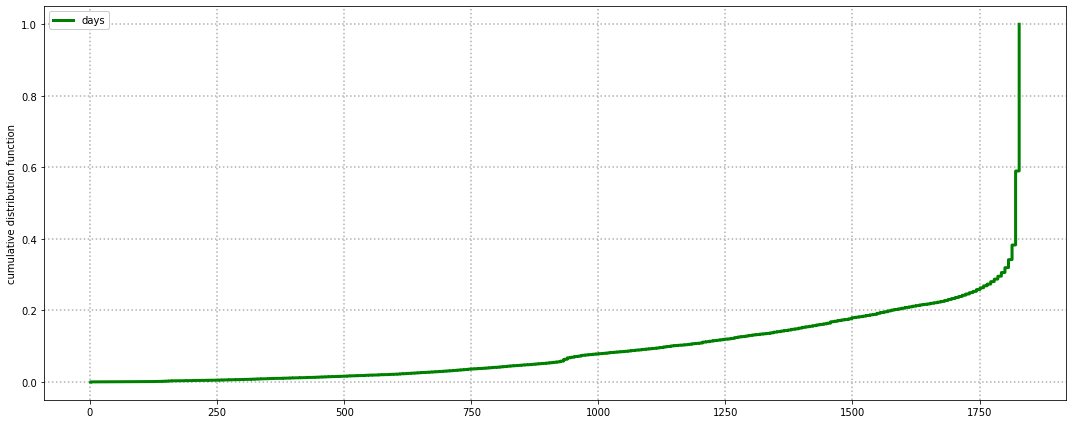

In [8]:
cdf([US_PAGES["deltas"].to_list()], ["days"], "", ["green", "blue"], x_title = "", xlog=False, size = (15, 6))

### Number of active pages per day

In [11]:
ACTIVE_PAGES_PER_DAY = pd.read_csv("active_pages_per_day.csv")
ACTIVE_PAGES_PER_DAY = ACTIVE_PAGES_PER_DAY.sort_values(by='day', ascending = True)

LISTED_IDS = LISTED_PAGES["page_id"].to_list()
NONLISTED_IDS = NONLISTED_PAGES["page_id"].to_list()

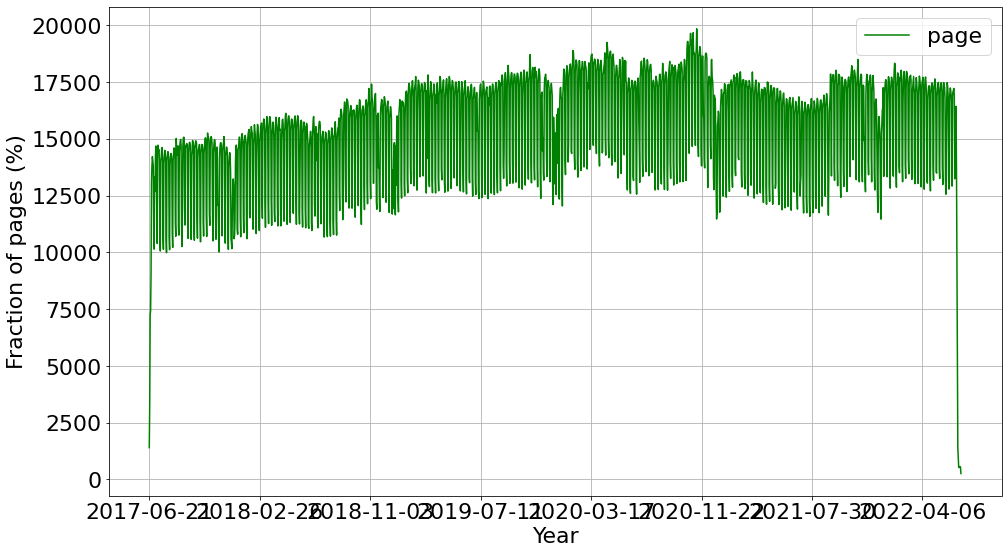

In [12]:
NB_ACTIVE_PAGES_PER_DAY = ACTIVE_PAGES_PER_DAY.groupby("day").count()

NB_ACTIVE_PAGES_PER_DAY["day"] = NB_ACTIVE_PAGES_PER_DAY.index.to_list()


initialize_style_parameters()
fig, ax = plt.subplots(figsize=(16,9))
NB_ACTIVE_PAGES_PER_DAY.plot(kind='line',ax=ax,color=['green', "blue"],rot=0, y=["page"], x="day", grid=True)
ax.set_xlabel('Year')
ax.set_ylabel('Fraction of pages (%)')
plt.title('')
plt.show()

#fig.savefig('figures/pages_created_time.pdf', bbox_inches='tight')




### Number of active listed and non listed pages per day

In [13]:
with open('posts_per_day_per_page.pkl', 'rb') as f:
    POSTS_PER_DAY_PER_PAGE = pickle.load(f)
    

In [15]:
DAYS_PER_PAGE = dict()

for page, days_and_posts in POSTS_PER_DAY_PER_PAGE.items():
    DAYS_PER_PAGE[page] = list(set(list(days_and_posts.keys())))  
    
LISTED_DAYS_PER_PAGE = {key:values for key, values in DAYS_PER_PAGE.items() if key in LISTED_IDS}
NONLISTED_DAYS_PER_PAGE = {key:values for key, values in DAYS_PER_PAGE.items() if key in NONLISTED_IDS}

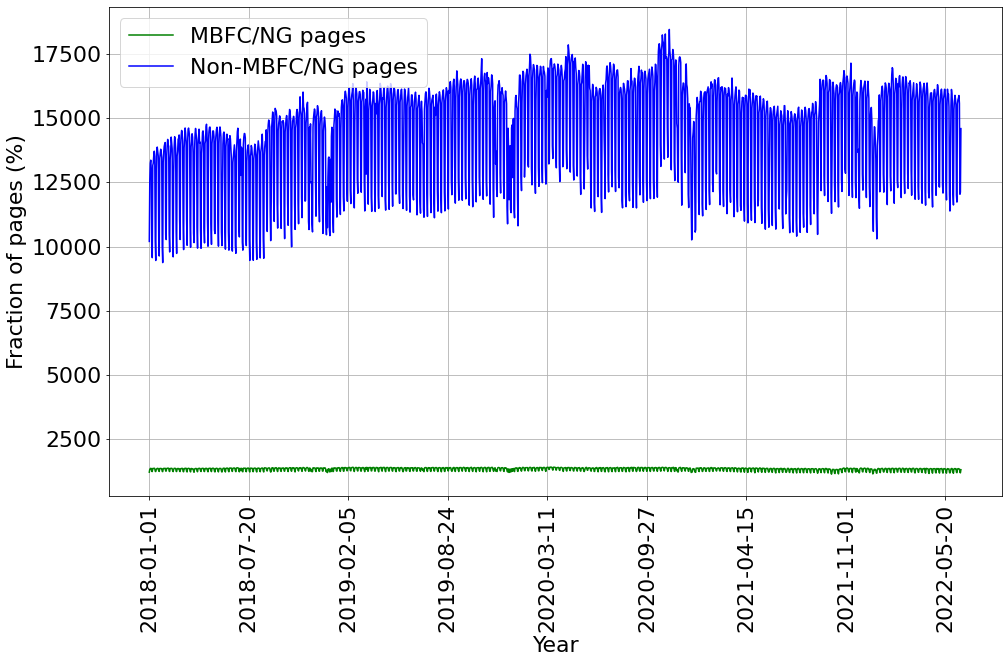

In [77]:
ACTIVE_PAGES_PER_DAY_ = dict()

for page_id, days in LISTED_DAYS_PER_PAGE.items():

    for day in days:
        
        if day not in ACTIVE_PAGES_PER_DAY_:
            
            ACTIVE_PAGES_PER_DAY_[day] = {"MBFC/NG pages": 0, "Non-MBFC/NG pages": 0}
            
        ACTIVE_PAGES_PER_DAY_[day]["MBFC/NG pages"] += 1

        
for page_id, days in NONLISTED_DAYS_PER_PAGE.items():

    for day in days:
        
        if day not in ACTIVE_PAGES_PER_DAY_:
            
            ACTIVE_PAGES_PER_DAY_[day] = {"MBFC/NG pages": 0, "Non-MBFC/NG pages": 0}
            
        ACTIVE_PAGES_PER_DAY_[day]["Non-MBFC/NG pages"] += 1


df = []

for date, values in ACTIVE_PAGES_PER_DAY_.items():
    
    df.append({"day": date, "MBFC/NG pages": values["MBFC/NG pages"], "Non-MBFC/NG pages":values["Non-MBFC/NG pages"]})
    
df = pd.DataFrame(df)

df = df.sort_values(by='day', ascending = True)

df = df[(df["day"] >= "2018-01-01") & (df["day"] <= "2022-06-20")]


initialize_style_parameters()
fig, ax = plt.subplots(figsize=(16,9))
df.plot(kind='line',ax=ax,color=['green', "blue"],rot=90, y=["MBFC/NG pages", "Non-MBFC/NG pages"], x="day", grid=True)
ax.set_xlabel('Year')
ax.set_ylabel('Fraction of pages (%)')
plt.title('')
plt.show()


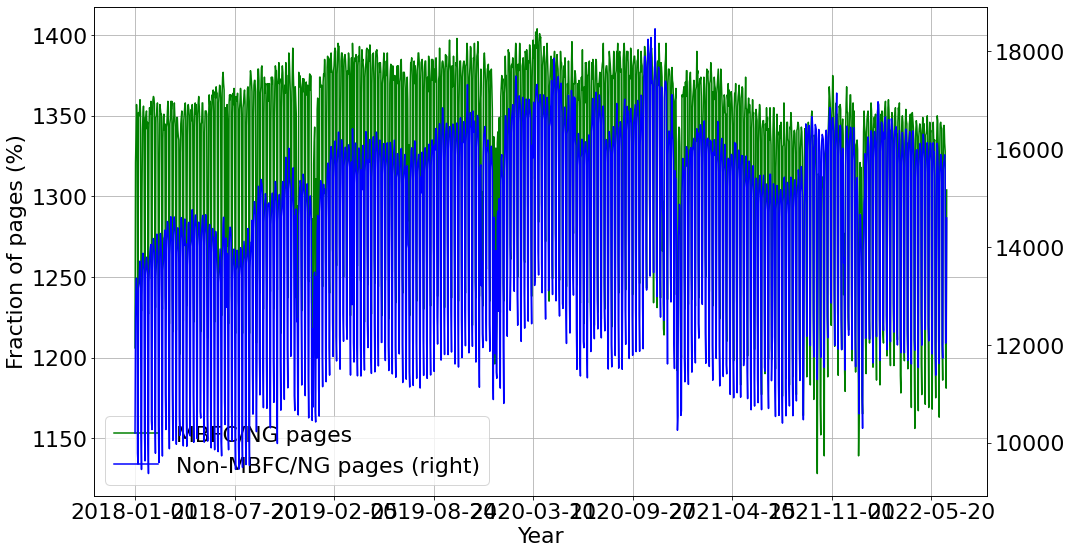

In [78]:
fig, ax = plt.subplots(figsize=(16,9))
df.plot(kind='line',ax=ax,color=['green'],rot=0, y=["MBFC/NG pages"], x="day", grid=True)
df.plot(kind='line',ax=ax,color=["blue"],rot=0, y=["Non-MBFC/NG pages"], x="day", grid=True, secondary_y = True)
ax.set_xlabel('Year')
ax.set_ylabel('Fraction of pages (%)')
plt.title('')
plt.show()


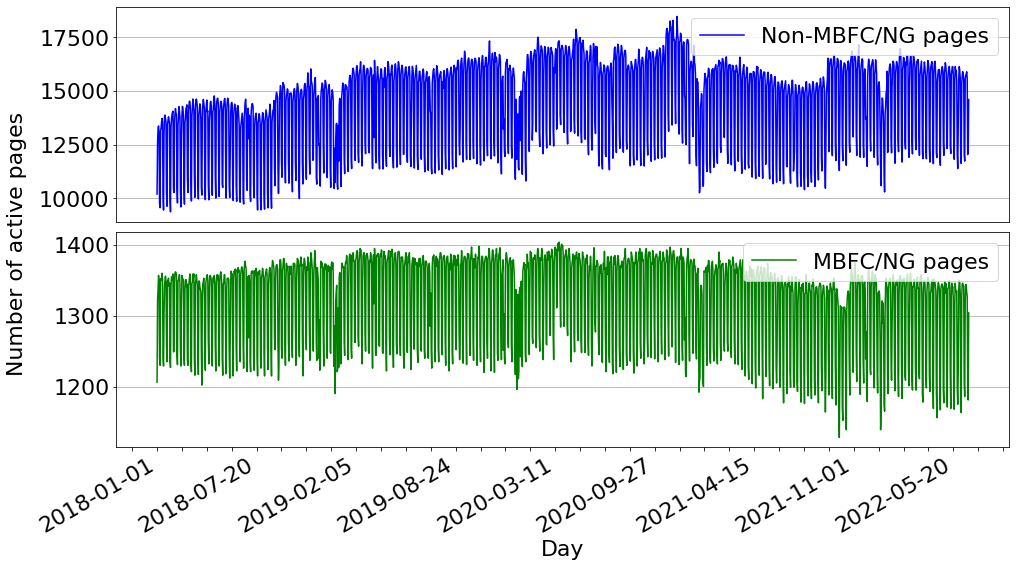

In [83]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, axs = plt.subplots(2, figsize=(16,9))

df.plot(kind='line',ax=axs[0],color=["blue"],rot=0, y=["Non-MBFC/NG pages"], x="day")
df.plot(kind='line',ax=axs[1],color=['green'],rot=0, y=["MBFC/NG pages"], x="day")


axs[0].set_ylabel('Number of active pages')
axs[0].axes.get_xaxis().set_visible(False)
axs[0].yaxis.set_label_coords(-.1, -0.1)

axs[1].xaxis.set_major_locator(loc)
axs[1].set_xlabel('Day')
axs[1].set_ylabel('')


plt.subplots_adjust(wspace=0, hspace=0.05)

fig.autofmt_xdate()

#axs[1].xaxis.set_major_locator(plt.AutoLocator())


axs[1].grid(axis='y')
axs[0].grid(axis='y')

axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')

fig.savefig('figures/number_of_active_pages_per_day.pdf', bbox_inches='tight')



plt.title('')
plt.show()


In [119]:
total = [df["MBFC/NG pages"].to_list()[index] + df["Non-MBFC/NG pages"].to_list()[index] for index in range(df.shape[0])]
df["total"] = total


days_2022 = [item for item in df["day"].to_list() if "2022" in item]
days_2021 = [item for item in df["day"].to_list() if "2021" in item]
days_2020 = [item for item in df["day"].to_list() if "2020" in item]
days_2019 = [item for item in df["day"].to_list() if "2019" in item]
days_2018 = [item for item in df["day"].to_list() if "2018" in item]

df[df["day"].isin(days_2020)].describe()



,MBFC/NG pages,Non-MBFC/NG pages,total
count,366.000000,366.000000,366.000000
mean,1341.748634,15429.163934,16770.912568
std,58.882536,1988.096506,2044.666589
min,1192.000000,10257.000000,11465.000000
25%,1277.000000,13404.000000,14678.000000
50%,1374.000000,16343.000000,17719.500000
75%,1384.000000,16909.000000,18293.750000
max,1404.000000,18459.000000,19842.000000


In [120]:
df[df["day"].isin(days_2022)].describe()


,MBFC/NG pages,Non-MBFC/NG pages,total
count,171.000000,171.000000,171.000000
mean,1298.549708,14827.081871,16125.631579
std,67.861898,1827.441469,1894.017811
min,1156.000000,10296.000000,11461.000000
25%,1218.500000,12589.500000,13808.000000
50%,1338.000000,15819.000000,17158.000000
75%,1347.000000,16132.500000,17483.000000
max,1360.000000,16969.000000,18325.000000


In [121]:
df[df["day"].isin(days_2021)].describe()


,MBFC/NG pages,Non-MBFC/NG pages,total
count,365.000000,365.000000,365.000000
mean,1308.358904,14493.619178,15801.978082
std,65.633682,1939.679764,2001.313924
min,1128.000000,10403.000000,11579.000000
25%,1243.000000,12436.000000,13695.000000
50%,1340.000000,15334.000000,16681.000000
75%,1357.000000,15989.000000,17356.000000
max,1390.000000,17146.000000,18492.000000


In [122]:
df[df["day"].isin(days_2020)].describe()


,MBFC/NG pages,Non-MBFC/NG pages,total
count,366.000000,366.000000,366.000000
mean,1341.748634,15429.163934,16770.912568
std,58.882536,1988.096506,2044.666589
min,1192.000000,10257.000000,11465.000000
25%,1277.000000,13404.000000,14678.000000
50%,1374.000000,16343.000000,17719.500000
75%,1384.000000,16909.000000,18293.750000
max,1404.000000,18459.000000,19842.000000


In [123]:
df[df["day"].isin(days_2019)].describe()


,MBFC/NG pages,Non-MBFC/NG pages,total
count,365.000000,365.000000,365.000000
mean,1338.802740,14660.632877,15999.435616
std,60.813031,1881.802603,1941.290534
min,1196.000000,10546.000000,11780.000000
25%,1268.000000,12513.000000,13773.000000
50%,1374.000000,15660.000000,17035.000000
75%,1383.000000,16057.000000,17439.000000
max,1398.000000,17319.000000,18709.000000


In [124]:
df[df["day"].isin(days_2018)].describe()


,MBFC/NG pages,Non-MBFC/NG pages,total
count,365.000000,365.000000,365.000000
mean,1322.339726,13175.254795,14497.594521
std,56.511495,1833.653058,1888.125437
min,1190.000000,9372.000000,10599.000000
25%,1257.000000,11255.000000,12512.000000
50%,1351.000000,13899.000000,15260.000000
75%,1364.000000,14509.000000,15870.000000
max,1392.000000,16019.000000,17408.000000


### Pages with the least activity 

/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


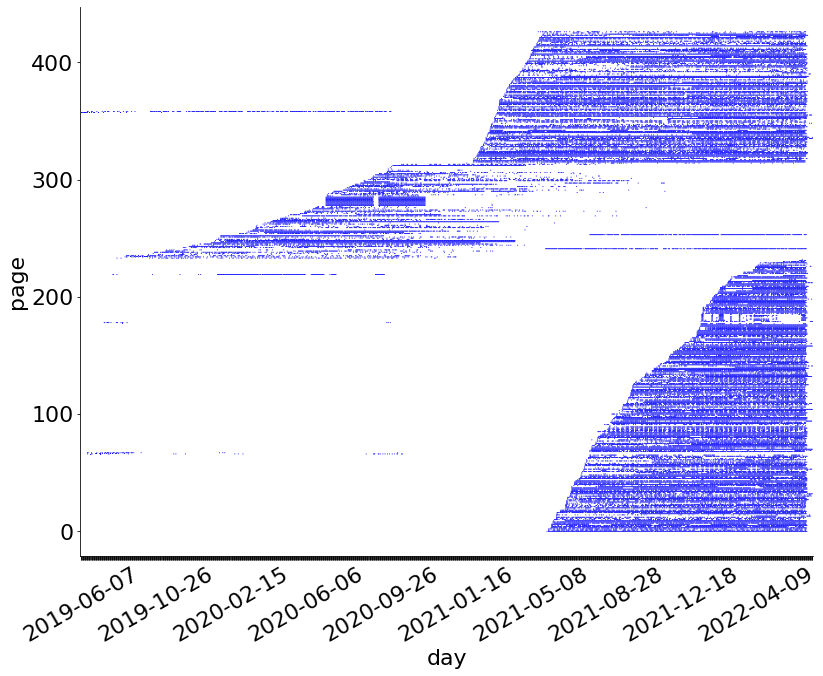

In [126]:
NB_PAGES = 500

#PAGE_IDS = PAGES_MIN_AND_MAX[PAGES_MIN_AND_MAX["max"]>="2020-12-31"]["page_id"].to_list()[:NB_PAGES]
#PAGE_IDS = PAGES_MIN_AND_MAX[(PAGES_MIN_AND_MAX["max"]>="2020-12-31") & (PAGES_MIN_AND_MAX["max"] <= "2021-12-31")]["page_id"].to_list()[:NB_PAGES]

#PAGE_IDS = PAGES_MIN_AND_MAX[(PAGES_MIN_AND_MAX["min"]>="2019-01-01") & (PAGES_MIN_AND_MAX["max"]>="2020-10-31") & (PAGES_MIN_AND_MAX["max"] <= "2021z-12-31")]["page_id"].to_list()[:NB_PAGES]

PAGE_IDS = PAGES_MIN_AND_MAX[(PAGES_MIN_AND_MAX["delta"]<500) & (PAGES_MIN_AND_MAX["max"] <="2022-12-01")]["page_id"].to_list()[:NB_PAGES]


PAGES_TO_CONSIDER = ACTIVE_PAGES_PER_DAY[ACTIVE_PAGES_PER_DAY["page"].isin(PAGE_IDS)]

OLD_PAGE_IDS = PAGES_TO_CONSIDER["page"].to_list()
DISTINCT_OLD_PAGE_IDS = set(OLD_PAGE_IDS)

idx = 0
for page_id in DISTINCT_OLD_PAGE_IDS:
    for idx2, page_id2 in enumerate(OLD_PAGE_IDS):
        if page_id2 == page_id:  
            OLD_PAGE_IDS[idx2] = idx    
    idx+=1
    
    
PAGES_TO_CONSIDER["page"] = OLD_PAGE_IDS

g = sns.catplot(data=PAGES_TO_CONSIDER, x="day", y="page", height=9, aspect=11.7/8.27, color="blue",s=1)

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%112 != 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()


In [147]:
PAGES_MIN_AND_MAX[(PAGES_MIN_AND_MAX["delta"]<500) & (PAGES_MIN_AND_MAX["max"] <="2022-12-01")]


NameError: name 'PAGES_MIN_AND_MAX' is not defined

In [154]:
a = US_PAGES[(US_PAGES["firstPostDate"]>"2020-01-01") & (US_PAGES["lastPostDate"] <="2021-06-31")]
print(a.shape)
a
#PAGE_IDS = PAGES_MIN_AND_MAX[(PAGES_MIN_AND_MAX["delta"]<500) & (PAGES_MIN_AND_MAX["max"] <="2022-12-01")]["page_id"].to_list()[:NB_PAGES]


(53, 65)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,deltas
904,904,904,904,904,904,136259623771,The Imperfect Messenger Foundation,2020-06-08,2021-04-26,0.0,13247.0,NEWS_SITE,107,336.0,8.000000,7.0,42,True,False,en,US,16.82243,77.570093,5.607477,voanews.com,voanews.com,1,2.547619,2.326087,0,2009-09,['US'],['en'],['NEWS_SITE'],['The Imperfect Messenger Foundation'],12,US,en,NEWS_SITE,1,1,1,1,0.0,United States (1),NaN,NaN,US,NaN,1.0,1.0,False,NaN,-1,-1,2020-10-01,True,False,True,../data/pages_posts_history_minhkha/1362596237...,2020-10-01,2015-01-01,17,0,323
1203,1203,1203,1203,1203,1203,1515899548656500,CBSN,2020-03-23,2020-10-12,171153.0,171689.0,MEDIA_NEWS_COMPANY,7,1593.0,796.500000,796.5,2,True,False,en,US,0.0,0.0,100.0,NaN,NaN,1,3.500000,0.241379,1,2014-11,['US'],['en'],['MEDIA_NEWS_COMPANY'],['CBSN'],2,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (8),NaN,NaN,US,NaN,8.0,1.0,False,NaN,-1,-1,2020-10-12,True,False,True,../data/pages_posts_history_minhkha/1515899548...,2020-10-12,2015-01-01,2,0,204
2200,2200,2200,2200,2200,2200,105354344557694,Stuff Liberals Hate,2020-06-15,2020-11-02,0.0,16302.0,NEWS_SITE,581,199868.0,12491.750000,2688.0,16,True,False,en,US,44.922547,50.430293,4.64716,thehill.com | dailywire.com | msnbc.com | poli...,thehill.com,27,36.312500,29.050000,0,2020-06,['US'],['en'],['NEWS_SITE'],['Stuff Liberals Hate'],1,US,en,NEWS_SITE,1,1,1,1,0.0,United States (1),NaN,NaN,US,NaN,1.0,1.0,False,NaN,-1,-1,2020-10-01,True,False,True,../data/pages_posts_history_minhkha/1053543445...,2020-10-01,2015-01-01,1,0,141
2940,2940,2940,2940,2940,2940,104884967965288,Stockton News Updates,2020-07-06,2021-03-15,0.0,132.0,NEWS_SITE,62,134.0,8.933333,3.0,15,True,False,en,US,8.064516,90.322581,1.612903,stocktonnewsupdates.com,stocktonnewsupdates.com,1,4.133333,1.722222,0,2020-07,['US'],['en'],['NEWS_SITE'],['Stockton News Updates'],3,US,en,NEWS_SITE,1,1,1,1,0.0,United States (1),NaN,NaN,US,NaN,1.0,1.0,False,NaN,-1,-1,2020-10-05,True,False,True,../data/pages_posts_history_minhkha/1048849679...,2020-10-05,2015-01-01,3,0,253
3339,3339,3339,3339,3339,3339,104521151192504,Newsmonger,2020-03-23,2021-02-15,0.0,5567.0,NEWSAGENT_NEWSSTAND,66,680.0,35.789474,18.0,19,True,False,en,US,3.030303,46.969697,50.0,NaN,NaN,1,3.473684,1.404255,0,2020-03,['US'],['en'],['NEWSAGENT_NEWSSTAND'],['Newsmonger'],32,US,en,NEWSAGENT_NEWSSTAND,1,2,1,1,0.0,"United States (1), Vietnam (1)",NaN,NaN,US,NaN,2.0,2.0,False,NaN,-1,-1,2020-10-01,True,False,True,../data/pages_posts_history_minhkha/1045211511...,2020-10-01,2015-01-01,23,0,330
3341,3341,3341,3341,3341,3341,101574224949150,Delaware Breaking News,2020-07-06,2021-03-08,0.0,0.0,MEDIA_NEWS_COMPANY,840,498.0,21.652174,18.0,23,True,False,en,US,100.0,0.0,0.0,NaN,NaN,1,36.521739,24.000000,0,2020-06,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Delaware Breaking News'],19,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2020-10-02,True,False,True,../data/pages_posts_history_minhkha/1015742249...,2020-1

In [158]:
a = US_PAGES[(US_PAGES["firstPostDate"]>"2020-01-01") & (US_PAGES["lastPostDate"] <="2021-06-31")]
print(a.shape)
a = a[["page_id", "page_name", "firstPostDate","lastPostDate","page_created_month", "currentFollowers"]]
a.sort_values("currentFollowers")
#PAGE_IDS = PAGES_MIN_AND_MAX[(PAGES_MIN_AND_MAX["delta"]<500) & (PAGES_MIN_AND_MAX["max"] <="2022-12-01")]["page_id"].to_list()[:NB_PAGES]


(53, 65)


,page_id,page_name,firstPostDate,lastPostDate,page_created_month,currentFollowers
26691,106949401015178,Nola Reporter,2020-05-04,2020-11-16,2020-05,0.0
6239,243019555786991,Poll Headlines,2020-06-22,2020-11-02,2012-02,0.0
11164,1022375624451871,The Sound of China,2020-04-27,2020-10-19,2016-01,0.0
3341,101574224949150,Delaware Breaking News,2020-07-06,2021-03-08,2020-06,0.0
6125,102831754660966,The Republican Patriot,2020-02-24,2020-11-23,2020-02,0.0
24517,2188921568024497,Now You Know,2020-08-31,2020-10-05,2018-09,0.0
26115,106092614468534,518Independent,2020-07-06,2021-04-19,2020-06,0.0
23345,111409883789976,Global Pandemic News,2020-05-11,2020-12-21,2020-02,0.0
10700,114407547096578,Patriotic News Network,2020-10-05,2021-03-08,2020-10,0.0
11983,105791667750292,Insurance Rate Reporter,2020-03-30,2020-11-16,2020-04,26.0
